## Plot comparision of surface oiling and mass on beaches to illustrate trajectories of different spill volumes
- Oil: Bunker-C
- Location: Straight of Georgia
- Date: June 05, 2015
- Spill volumes informed by Marathassa, COSCO Busan, and DBL-152 in [Past Spill Events & Vessel Info](https://docs.google.com/spreadsheets/d/1AQGhAMGJUqlbZMeX0FmVuT5PU9dTrKyYepdN5y7xNn4/edit#gid=632012283) spreadsheet (with a "too small to document" and  10x largest ship spill as book-ends)
- Spill location in SOG: -123.67 E, 49.21 N

In [1]:
import sys
sys.path.insert(1, '/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import xarray as xr

from midoss_utils import *
import cmocean as cm
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools as gt 

# set figure fontsizes
fs=12 
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs+4)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
%matplotlib inline

### load model output for comparison of different oil volumes

In [2]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/volume_test')
# volume information
volume_str = ["0p01", "3", "200", "7000", "70000"]
volume_amounts = [0.01, 3, 300, 7000, 70000]
units = 'meters cubed'

start_time = np.datetime64('2015-06-05T00:30:00')

# allocate variables
fname = {}
results = {}
volume_sfc = {}
thick2d_sum = {}
volume_beached = {}

for volume in volume_str: 
    print(f'starting {volume}')
    fname[volume] = results_path/f'Lagrangian_out_{volume}.nc'
    results[volume] = xr.open_dataset(fname[volume])
    thick2d = results[volume].Thickness_2D
    thick2d_sum[volume] = thick2d.sum(dim='time')
    volume_sfc[volume] = results[volume]['OilWaterColumnOilVol_3D'][:,39,:,:].sum(dim='time')
    
    # calculate beaching volume from 2D thickness
    beachingtime    = results[volume].Beaching_Time[:]
    thickness2D     = thick2d[:]
    # get array size to use for converting time into numeric values
    [ny,nx] = beachingtime.shape
    x_range = range(nx)
    y_range = range(ny)
    # convert beaching time to numeric value
    display('Calculating beaching time')
    beachingtime_asnum = np.array([[((np.datetime64(beachingtime.values[jj,ii]) - start_time) / np.timedelta64(1, 'D')) for ii in x_range] for jj in y_range])
    # set locations of absent a beaching timescale to zero
    beachingtime_asnum[beachingtime_asnum==0] = np.nan
    # create a logical array of true "keepers" where beaching time scale is non-zero
    keepers   = np.isreal(beachingtime_asnum)
    # similarly, a logical array of wasteland garbage where beaching time scale is absent 
    notkeepers = np.isnan(beachingtime_asnum)
    [nt,ny,nx] = thickness2D.shape
    beachingvolume = 500 * 440 * thickness2D[nt-1,:,:].where(keepers).values * 1e-6
    beachingvolume[beachingvolume==0] = np.nan
    volume_beached[volume] = beachingvolume


starting 0p01


'Calculating beaching time'

starting 3


'Calculating beaching time'

starting 200


'Calculating beaching time'

starting 7000


'Calculating beaching time'

starting 70000


'Calculating beaching time'

### load model output for comparison of different oil types (with same volume)
- Note: These results ran wiht NBR_PARTIC = 2000 rather than 10000

In [3]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/oiltype_test/')
# volume information
oil_types = ["diesel", "akns", "bunkerc", "dilbit", "dilbitEC2013"]
units = 'meters cubed'

# allocate variables
fname = {}
for oil in oil_types: 
    print(f'starting {oil}')
    fname[oil] = results_path/f'Lagrangian_out_{oil}.nc'
    results[oil] = xr.open_dataset(fname[oil])
    thick2d = results[oil].Thickness_2D
    volume_sfc[oil] = results[oil]['OilWaterColumnOilVol_3D'][:,39,:,:].sum(dim='time')
    
# calculate beaching volume from 2D thickness
    beachingtime    = results[oil].Beaching_Time[:]
    thickness2D     = thick2d[:]
    # get array size to use for converting time into numeric values
    [ny,nx] = beachingtime.shape
    x_range = range(nx)
    y_range = range(ny)
    # convert beaching time to numeric value
    display('Calculating beaching time')
    beachingtime_asnum = np.array([[((np.datetime64(beachingtime.values[jj,ii]) - start_time) / np.timedelta64(1, 'D')) for ii in x_range] for jj in y_range])
    # set locations of absent a beaching timescale to zero
    beachingtime_asnum[beachingtime_asnum==0] = np.nan
    # create a logical array of true "keepers" where beaching time scale is non-zero
    keepers   = np.isreal(beachingtime_asnum)
    # similarly, a logical array of wasteland garbage where beaching time scale is absent 
    notkeepers = np.isnan(beachingtime_asnum)
    [nt,ny,nx] = thickness2D.shape
    beachingvolume = 500 * 440 * thickness2D[nt-1,:,:].where(keepers).values * 1e-6
    beachingvolume[beachingvolume==0] = np.nan
    volume_beached[oil] = beachingvolume

starting diesel


'Calculating beaching time'

starting akns


'Calculating beaching time'

starting bunkerc


'Calculating beaching time'

starting dilbit


'Calculating beaching time'

starting dilbitEC2013


'Calculating beaching time'

In [4]:
# get spill location in grid coordinates
[ygd,xgd]=gt.find_closest_model_point(
    -123.67, 
    49.21,results['3'].Longitude,
    results['3'].Latitude
)

## To start with, show "footprint" of oiling via time-integrated values

<ipython-input-5-e780fbc6939e>:10: RuntimeWarning: divide by zero encountered in log10
  np.log10(thick2d_sum[volume].values),
<ipython-input-5-e780fbc6939e>:10: RuntimeWarning: invalid value encountered in log10
  np.log10(thick2d_sum[volume].values),
<ipython-input-5-e780fbc6939e>:47: RuntimeWarning: divide by zero encountered in log10
  np.log10(volume_sfc[volume].values),


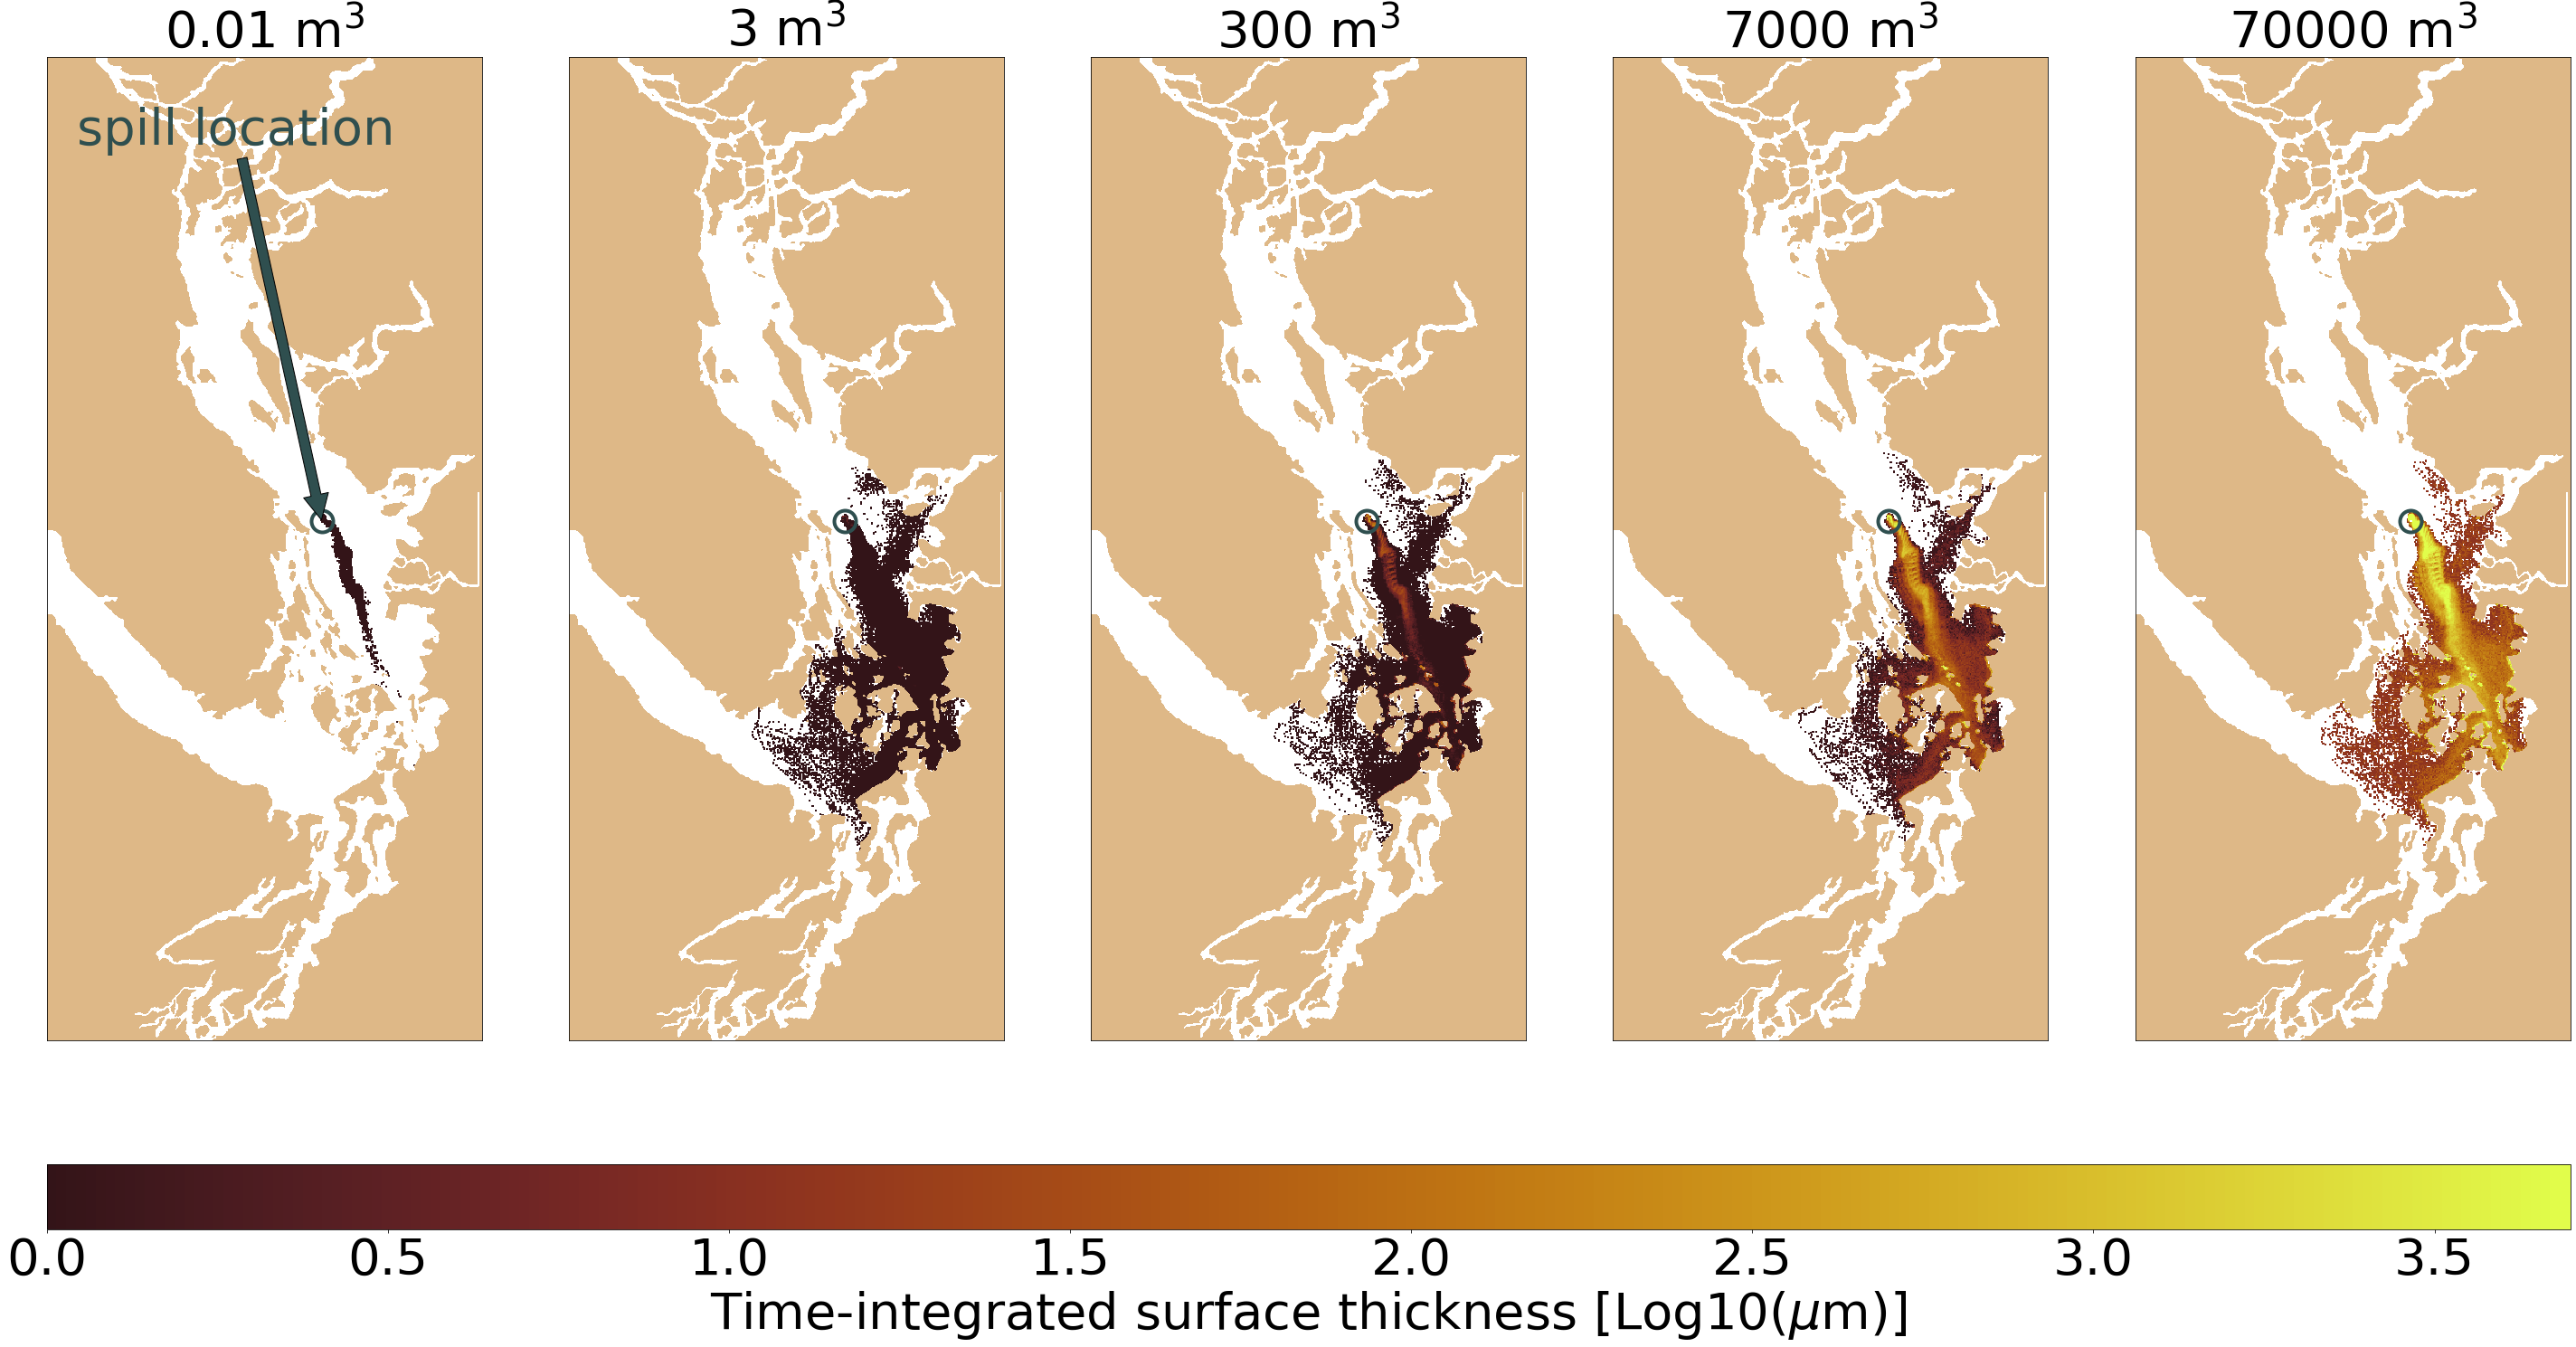

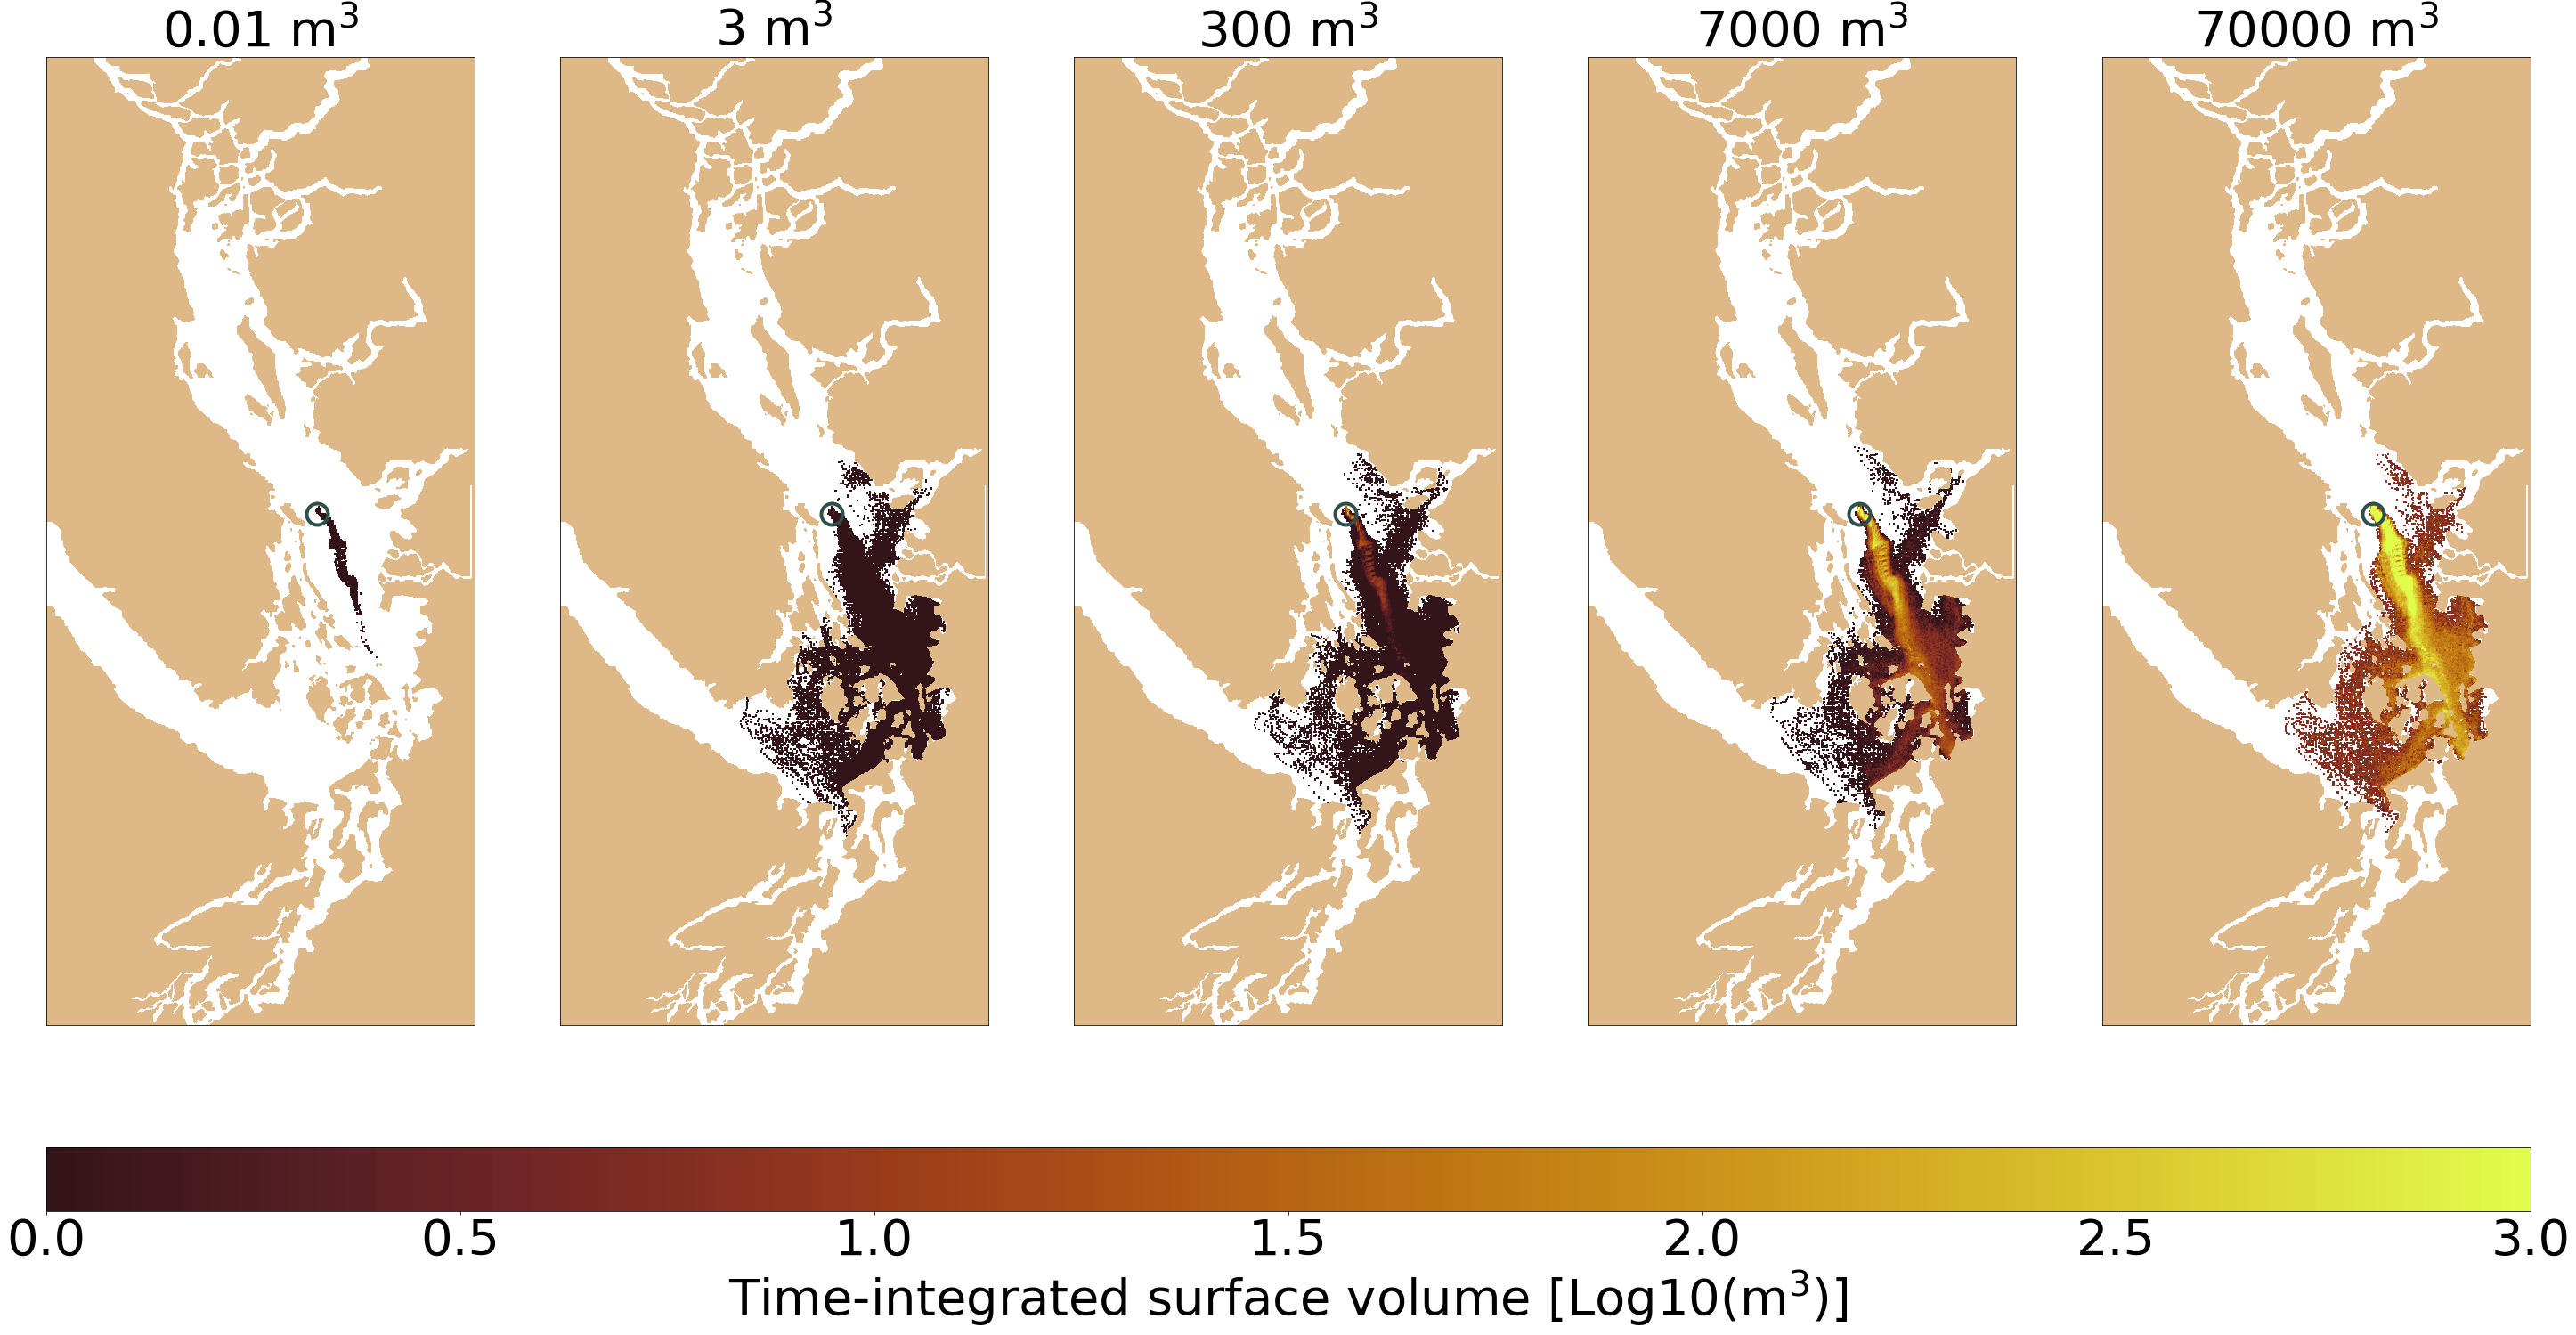

In [5]:
fig1 = plt.figure(figsize=(50,20))
fig2 = plt.figure(figsize=(50,20))

# loop over all volumes and plot thickness in upper panels with volumes in lower
for plot_index,volume in enumerate(volume_str):
    
    ax1 = fig1.add_subplot(1,5,plot_index+1)
    # convert xarray into numpy using ".values" in order to gain access to different visualization tools
    mappable = ax1.pcolormesh(
        np.log10(thick2d_sum[volume].values), 
        vmin = 0, 
        vmax = np.log10(5000), 
        cmap = cm.cm.solar)
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(ax1,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    ax1.set_title(f'{volume_amounts[plot_index]} m$^3$', fontsize=56)
    ax1.set_xticks([])
    ax1.set_yticks([])
    # add spill location with text in first panel
    ax1.plot(xgd+0.5,ygd+0.5,
                 'o',
                 markerfacecolor='none',
                 color='darkslategrey',
                 markersize=24,
                markeredgewidth=4)
    if plot_index==0:
        ax1.annotate('spill location', xy=(xgd,ygd),  
                xytext=(0.8, 0.95), textcoords='axes fraction',
                arrowprops=dict(facecolor='darkslategrey',arrowstyle='simple'),
                horizontalalignment='right', verticalalignment='top',
                fontsize=56,color='darkslategrey')
                     
    if plot_index==3:
        ax_cbar = fig1.add_axes([0.125, -.02, 0.775, .05]) 
        cbar = plt.colorbar(
            mappable, 
            cax=ax_cbar, 
            orientation='horizontal'
        )
        cbar.ax.tick_params(labelsize=56) 
        cbar.set_label('Time-integrated surface thickness [Log10($\mu$m)]', fontsize = 56);

   
    ax2 = fig2.add_subplot(1,5,plot_index+1)
    # convert xarray into numpy using ".values" in order to gain access to different visualization tools
    mappable = ax2.pcolormesh(
        np.log10(volume_sfc[volume].values), 
        vmin = 0, 
        vmax = 3, 
        cmap = cm.cm.solar)    
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(ax2,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    ax2.set_title(f'{volume_amounts[plot_index]} m$^3$', fontsize=56)
    ax2.set_xticks([])
    ax2.set_yticks([])
    # add spill location with text in first panel
    ax2.plot(xgd+0.5,ygd+0.5,
                 'o',
                 markerfacecolor='none',
                 color='darkslategrey',
                 markersize=24,
                markeredgewidth=4)
    if plot_index==3:
        ax_cbar = fig2.add_axes([0.125, -.02, 0.775, .05]) 
        cbar = plt.colorbar(
            mappable, 
            cax=ax_cbar, 
            orientation='horizontal'
        )
        cbar.ax.tick_params(labelsize=56) 
        cbar.set_label('Time-integrated surface volume [Log10(m$^3$)]', fontsize = 56);
        

## Plot up beaching volume for the different spill volume classes as well as the different oil types

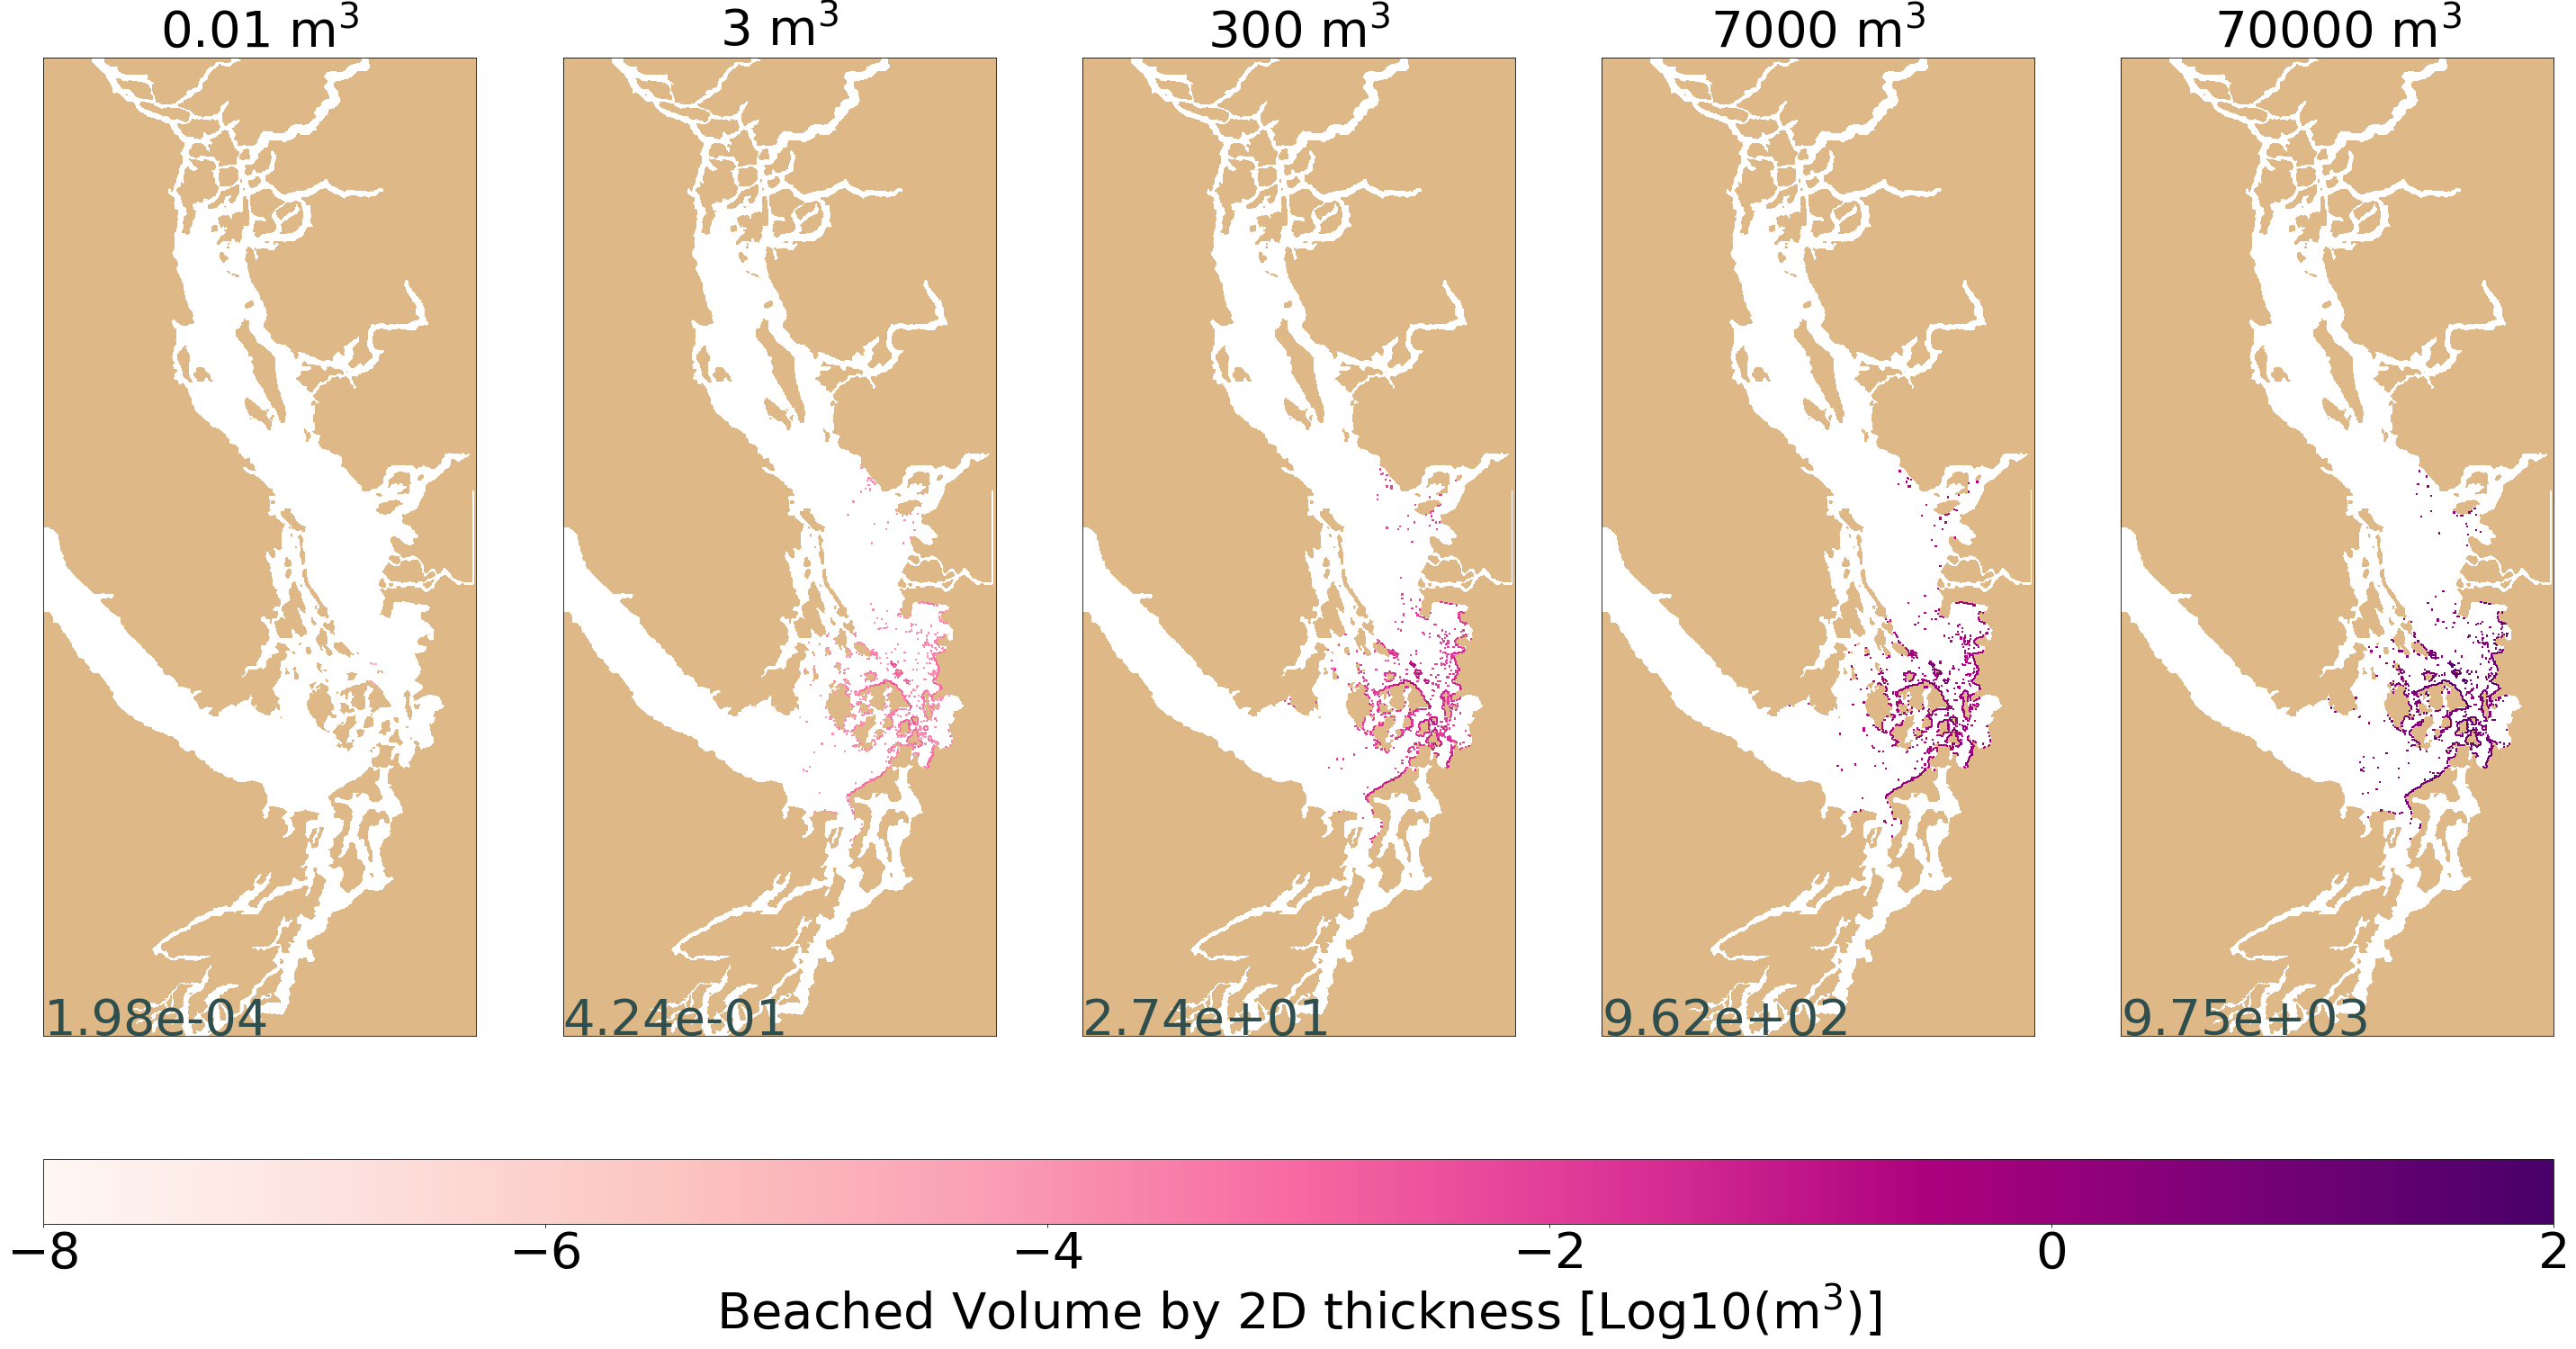

In [6]:
fig, axs = plt.subplots(1,5,figsize=(50,20))

# loop over all volumes and plot thickness in upper panels with volumes in lower
for plot_index,volume in enumerate(volume_str):
    #ax1 = fig1.add_subplot(1,5,plot_index+1)
    # convert xarray into numpy using ".values" in order to gain access to different visualization tools
    viz_tools.plot_land_mask(axs[plot_index],'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    mappable = axs[plot_index].pcolormesh(
        np.log10(volume_beached[volume]),
        vmin = np.log10(1e-8),
        vmax = np.log10(1e2),
        cmap = 'RdPu'
    )
    # add land mask to ax1 and ax2
    axs[plot_index].set_title(f'{volume_amounts[plot_index]} m$^3$', fontsize=56)
    axs[plot_index].set_xticks([])
    axs[plot_index].set_yticks([])
    # add spill location with text in first panel
    axs[plot_index].text(0.05, 1, 
        f'{np.nansum(volume_beached[volume]):4.2e}', 
        fontsize=56, color='darkslategrey'
    )
                     
    if plot_index==3:
        ax_cbar = fig.add_axes([0.125, -.02, 0.775, .05]) 
        cbar = plt.colorbar(
            mappable, 
            cax=ax_cbar, 
            orientation='horizontal'
        )
        cbar.ax.tick_params(labelsize=56) 
        cbar.set_label('Beached Volume by 2D thickness [Log10(m$^3$)]', fontsize = 56);

    

## Compare how a 7000 m$^3$ spill looks for different oil-types

<ipython-input-7-53a3e66d42ad>:9: RuntimeWarning: divide by zero encountered in log10
  np.log10(volume_sfc[oil].values),


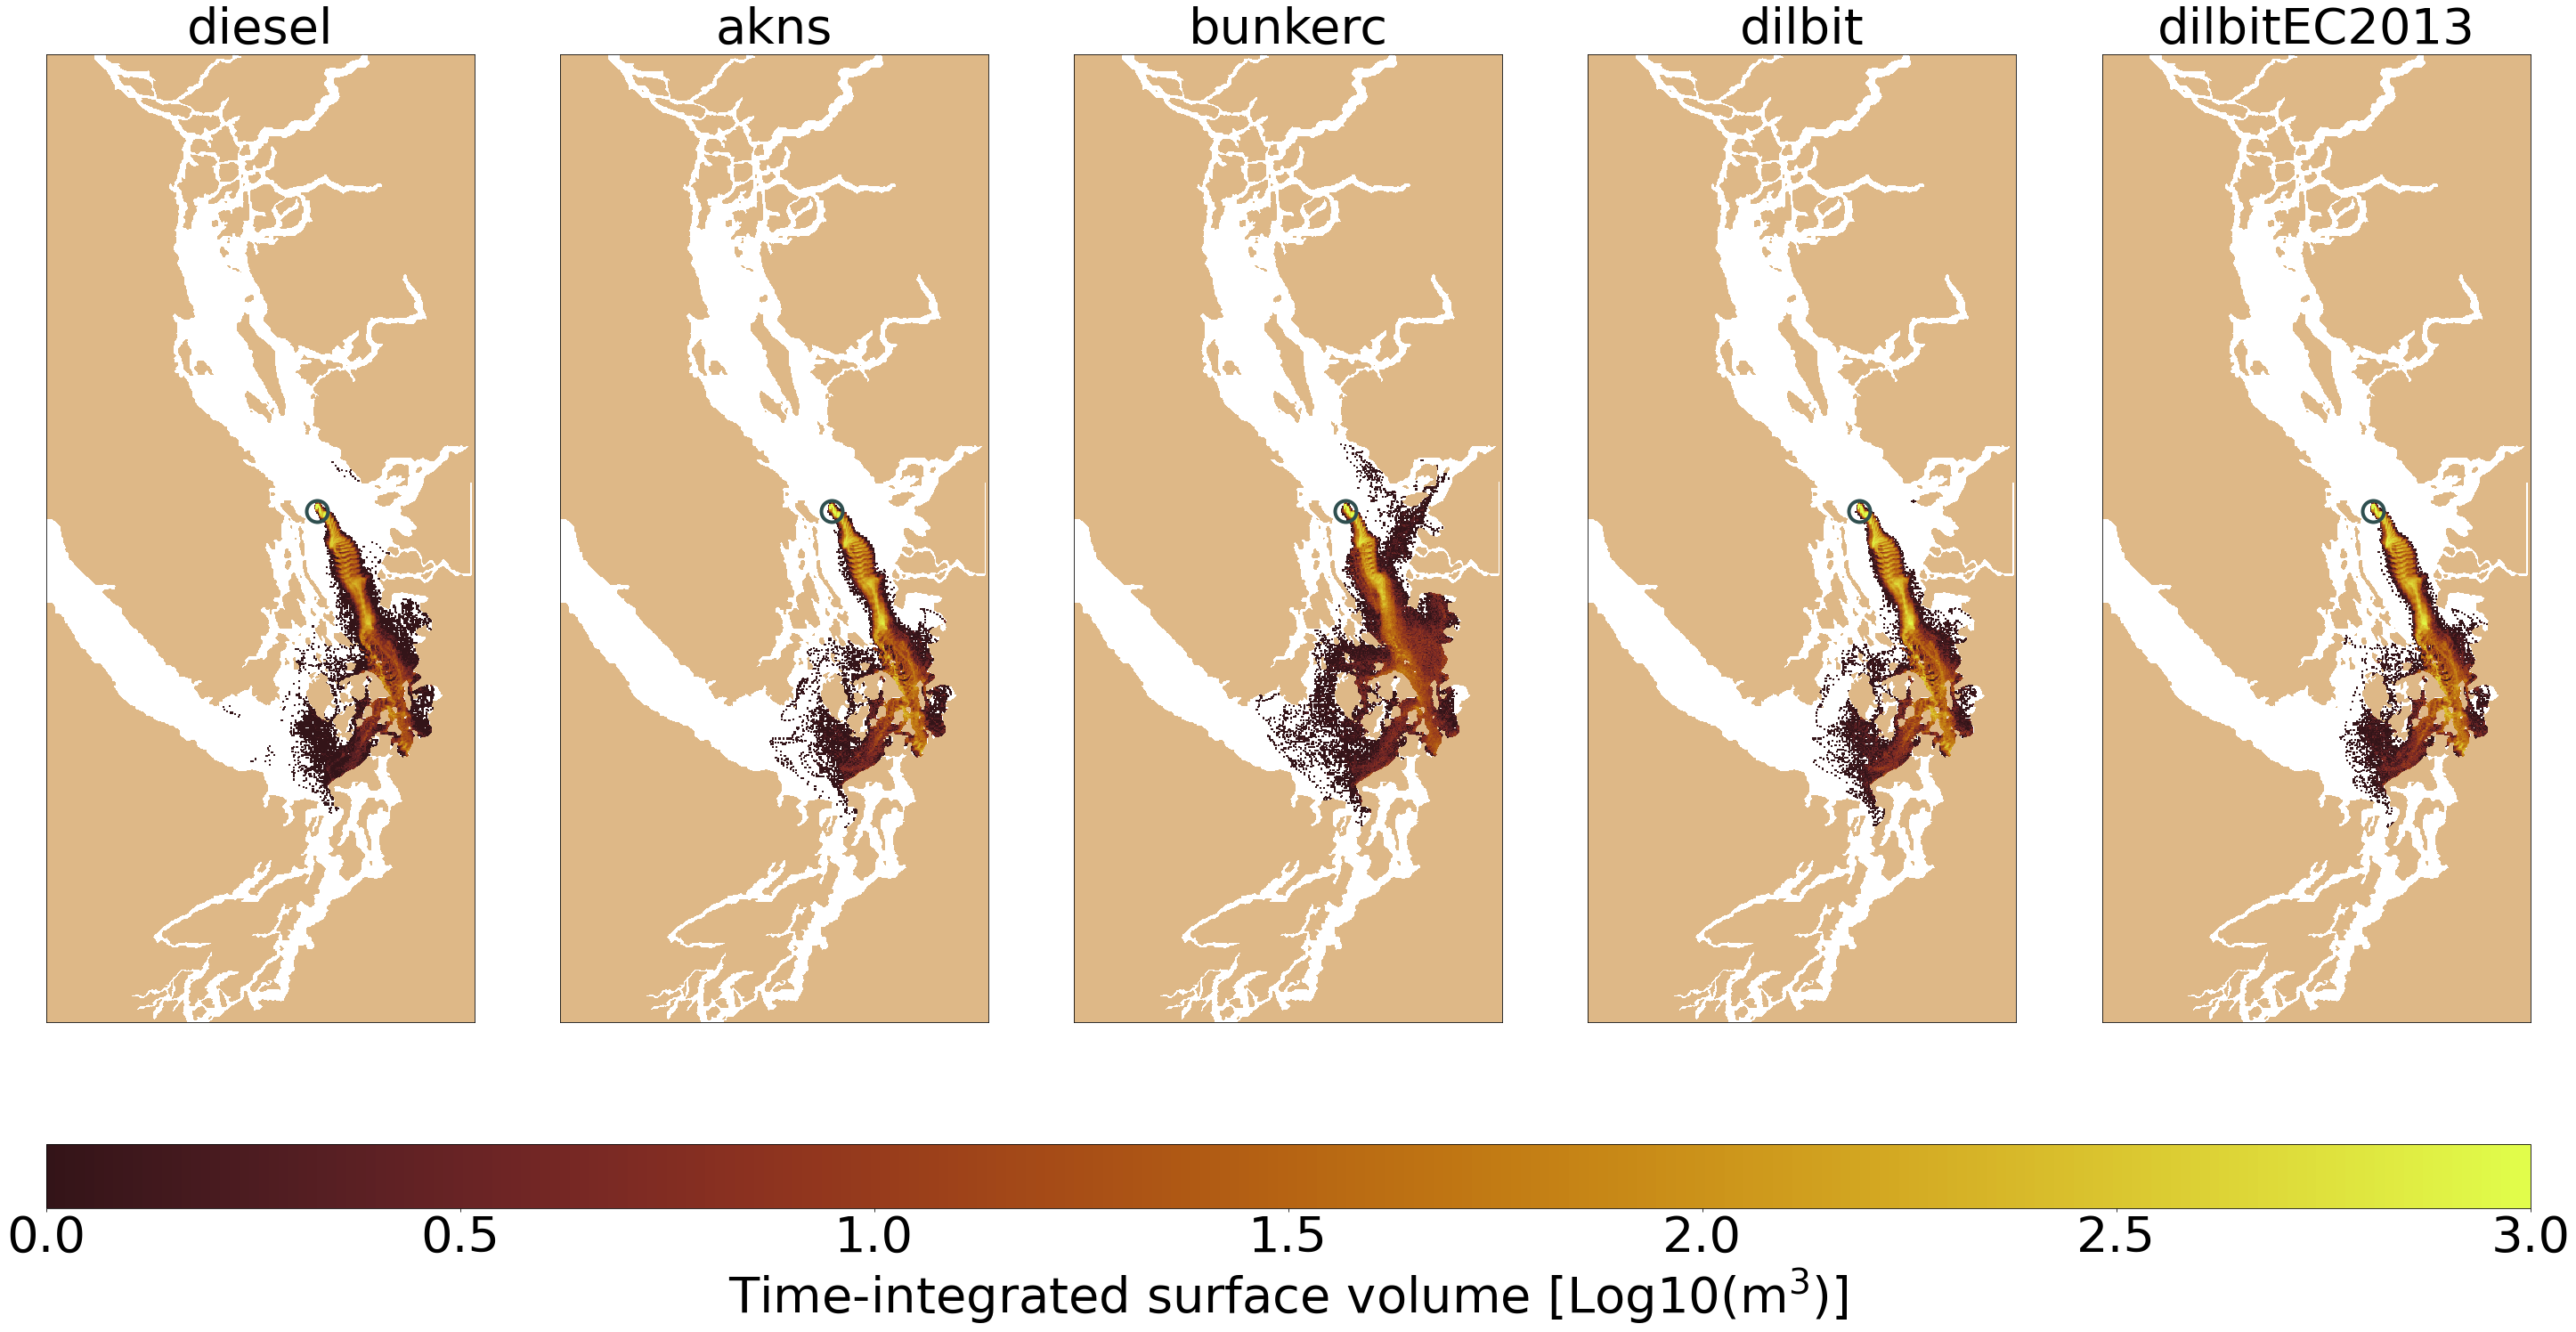

In [7]:
fig1 = plt.figure(figsize=(50,20))

# loop over all volumes and plot thickness in upper panels with volumes in lower
for plot_index,oil in enumerate(oil_types):
    
    ax2 = fig1.add_subplot(1,5,plot_index+1)
    # convert xarray into numpy using ".values" in order to gain access to different visualization tools
    mappable = ax2.pcolormesh(
        np.log10(volume_sfc[oil].values), 
        vmin = 0, 
        vmax = 3, 
        cmap = cm.cm.solar)    
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(ax2,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    ax2.set_title(f'{oil}', fontsize=56)
    ax2.set_xticks([])
    ax2.set_yticks([])
    # add spill location with text in first panel
    ax2.plot(xgd+0.5,ygd+0.5,
                 'o',
                 markerfacecolor='none',
                 color='darkslategrey',
                 markersize=24,
                markeredgewidth=4)
    if plot_index==3:
        ax_cbar = fig1.add_axes([0.125, -.02, 0.775, .05]) 
        cbar = plt.colorbar(
            mappable, 
            cax=ax_cbar, 
            orientation='horizontal'
        )
        cbar.ax.tick_params(labelsize=56) 
        cbar.set_label('Time-integrated surface volume [Log10(m$^3$)]', fontsize = 56);

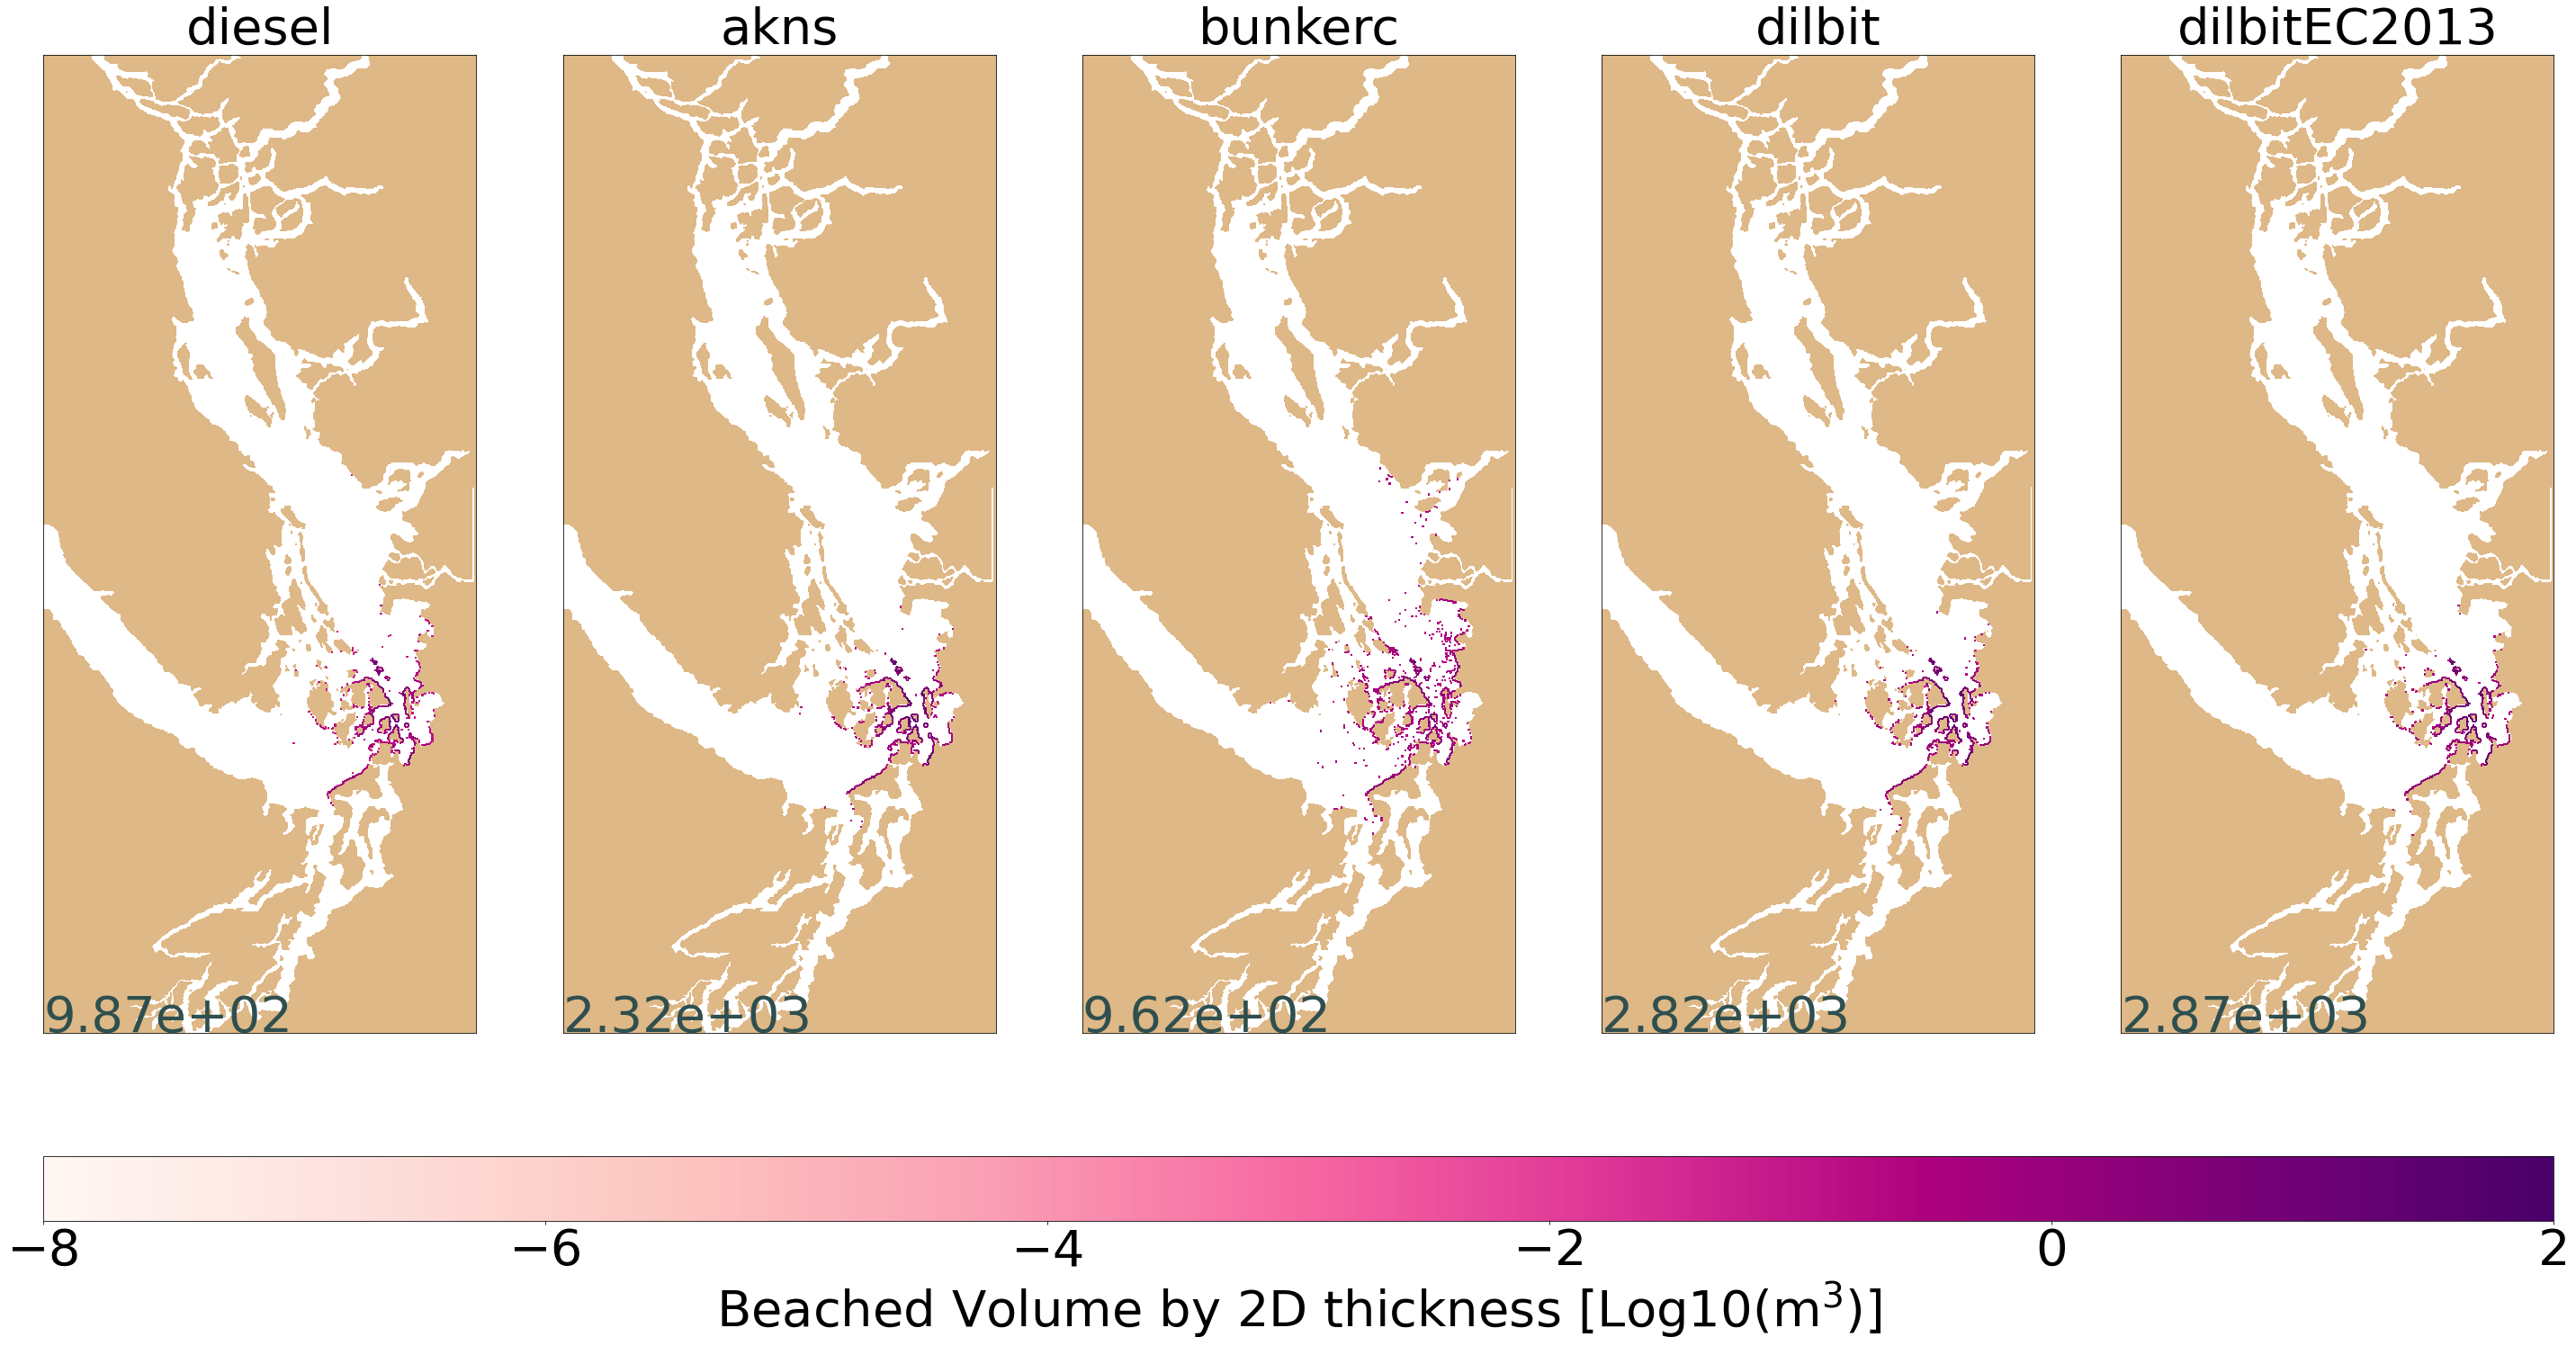

In [9]:
fig, axs = plt.subplots(1,5,figsize=(50,20))

# loop over all volumes and plot thickness in upper panels with volumes in lower
for plot_index,oil in enumerate(oil_types):
    viz_tools.plot_land_mask(axs[plot_index],'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    mappable = axs[plot_index].pcolormesh(
        np.log10(volume_beached[oil]),
        vmin = np.log10(1e-8),
        vmax = np.log10(1e2),
        cmap = 'RdPu'
    )
    # add land mask to ax1 and ax2
    axs[plot_index].set_title(f'{oil}', fontsize=56)
    axs[plot_index].set_xticks([])
    axs[plot_index].set_yticks([])
    # add spill location with text in first panel
    axs[plot_index].text(0.05, 1, 
        f'{np.nansum(volume_beached[oil]):4.2e}', 
        fontsize=56, color='darkslategrey'
    )
                     
    if plot_index==3:
        ax_cbar = fig.add_axes([0.125, -.02, 0.775, .05]) 
        cbar = plt.colorbar(
            mappable, 
            cax=ax_cbar, 
            orientation='horizontal'
        )
        cbar.ax.tick_params(labelsize=56) 
        cbar.set_label('Beached Volume by 2D thickness [Log10(m$^3$)]', fontsize = 56);


## Plot up mass comparisons across different spill volumes

In [10]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/volume_test/')
sro_results = {}
fname={}
for plot_index,volume in enumerate(volume_str):
    fname[volume] = results_path/f'resOilOutput_{volume}.sro'
    sro_results[volume] = load_sro(fname[volume])
    sro_results[volume] = sro_results[volume].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    sro_results[volume]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in sro_results[volume].iterrows()]
    # net mass of weathered oil
    sro_results[volume]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in sro_results[volume].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = volume_amounts[plot_index] #m3
    initial_density = sro_results[volume]['Density'][0] #kg/m3
    sro_results[volume]['MInitial'] = [spill_volume * initial_density for i in range(len(sro_results[volume].Density))]

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


In [11]:
sro_results['3'].keys()

Index(['seconds_since_spill', 'YY', 'MM', 'DD', 'hh', 'mm', 'ss', 'MFloating',
       'VolOilBeached', 'VolumeBeached', 'VolumeOil', 'Volume', 'Area',
       'TeoricalArea', 'Thickness', 'MEvaporated', 'VEvaporated',
       'FMEvaporated', 'MDispersed', 'VDispersed', 'FMDispersed',
       'MSedimented', 'VSedimented', 'FMSedimented', 'MDissolved',
       'VDissolved', 'FMDissolved', 'MChemDisp', 'VChemDisp', 'FMChemDisp',
       'MOilRecovered', 'VOilRecovered', 'FMOilRecovered', 'MWaterContent',
       'VWaterContent', 'Density', 'Viscosity', 'MBio', 'VBio', 'FMBio',
       'CharacteristicDiameter', 'P_Star', 'AnalyteMass1', 'AnalyteMass2',
       'AnalyteMass3', 'AnalyteMass4', 'AnalyteMass5', 'AnalyteBio1',
       'AnalyteBio2', 'AnalyteBio3', 'AnalyteBio4', 'AnalyteBio5', 'datetime',
       'MBeached', 'MTotal', 'MInitial'],
      dtype='object')

In [12]:
plot_values = ['MFloating',
       'VolOilBeached', 'VolumeBeached', 'VolumeOil', 'Area',
       'Thickness', 'MEvaporated', 'MDispersed', 
       'MDissolved', 'MWaterContent',
       'Density', 'Viscosity', 'MBio', 
        'MBeached', 'MTotal', 'MInitial']

color_dict = {"bunkerc": "darkblue",
              "dilbit": "royalblue", 
              "dilbitEC2013": "royalblue",
              "akns": "skyblue", 
              "diesel": "darkolivegreen",
              "0p01": "thistle", 
              "3": "mediumorchid", 
              "200": "rebeccapurple", 
              "7000": "darkviolet", 
              "70000": "indigo"}

linestyle_dict = {"bunkerc": "-",
              "dilbit": "-", 
              "dilbitEC2013": "--", 
              "akns": "-",
              "diesel": "-"}

/Users/rmueller/opt/miniconda3/envs/standard/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


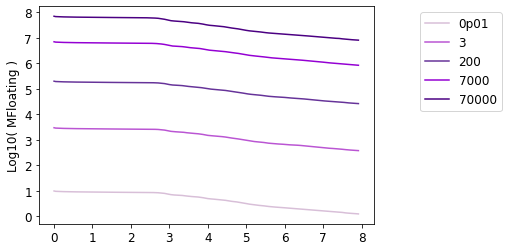

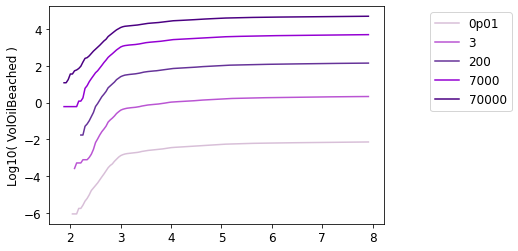

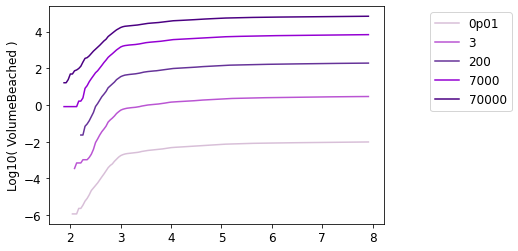

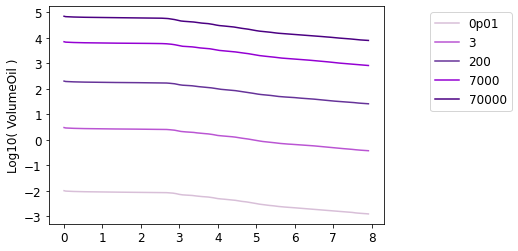

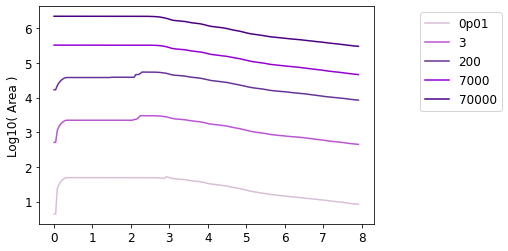

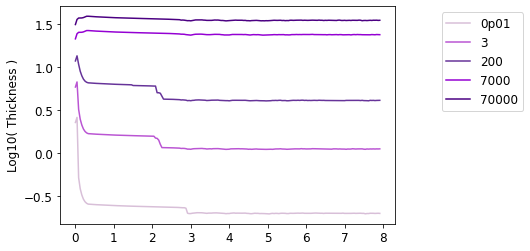

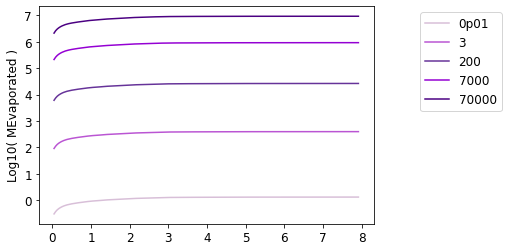

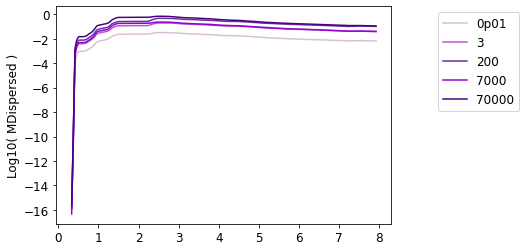

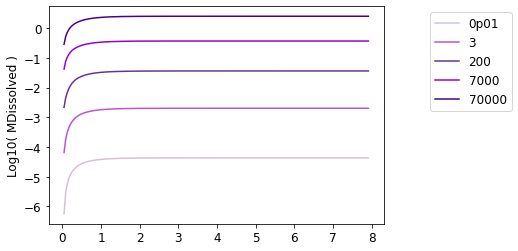

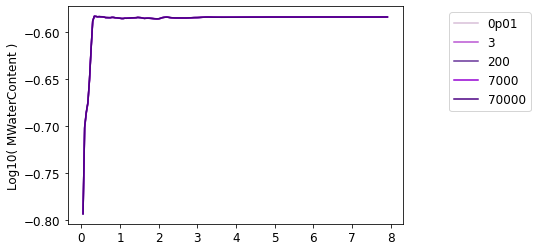

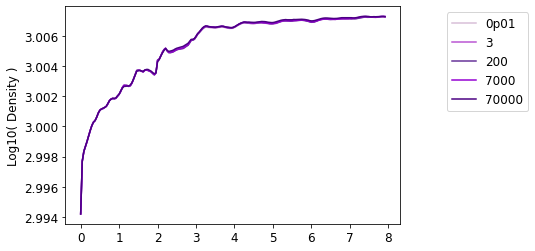

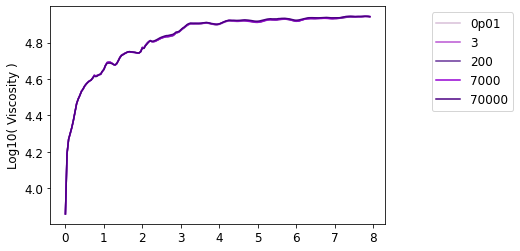

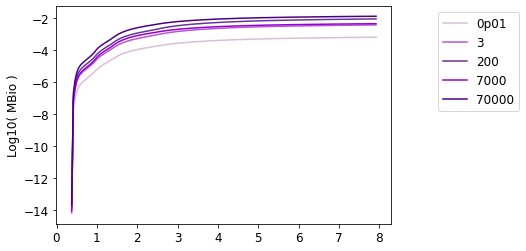

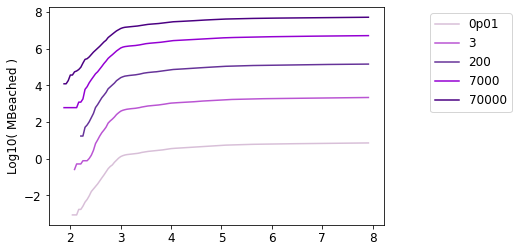

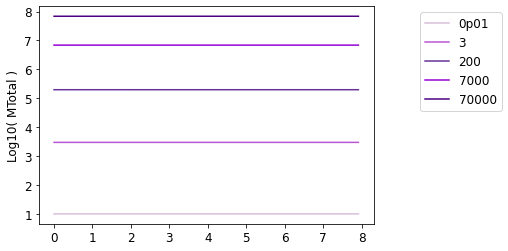

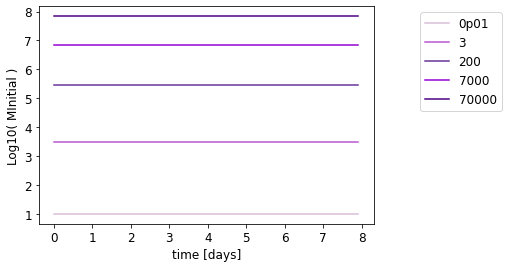

In [13]:
for value in plot_values:
    #yscale = 'log' if 'Viscosity' in value else 'linear'
    yscale = 'linear'
    fig, ax = plt.subplots()
    for volume in volume_str:
        ax.plot(np.log10(sro_results[volume][value]),
               label = volume,
               linewidth=1.5,
               color = color_dict.get(volume,'#333333'))

    ax.set_ylabel(f'Log10( {value} )')
    if value in plot_values[-1]:
        ax.set_xlabel('time [days]')
    ax.set_yscale(yscale)
    ax.legend(bbox_to_anchor=(1.4, 1))
    #plt.savefig(graphics_path/f'{value}.png')

## Plot up mass comparisons across different oil types 

In [16]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/oiltype_test/')
oil_types = ["diesel", "akns", "bunkerc", "dilbit", "dilbitEC2013"]
fname={}
for plot_index,oil in enumerate(oil_types):
    fname[oil] = results_path/f'resOilOutput_{oil}.sro'
    sro_results[oil] = load_sro(fname[oil])
    sro_results[oil] = sro_results[oil].rename(columns={"MassOil":"MFloating"})
    # calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
    sro_results[oil]['MBeached'] = [row['VolOilBeached']*row['Density']/(1-row['VWaterContent'])*(1-row['MWaterContent']) for day, row in sro_results[oil].iterrows()]
    # net mass of weathered oil
    sro_results[oil]['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in sro_results[oil].iterrows()]
    #results[oil] = results[oil].drop(['VolOilBeached','Density'], axis=1)
    # Initial spill mass
    spill_volume = volume_amounts[plot_index] #m3
    initial_density = sro_results[oil]['Density'][0] #kg/m3
    sro_results[oil]['MInitial'] = [spill_volume * initial_density for i in range(len(sro_results[oil].Density))]

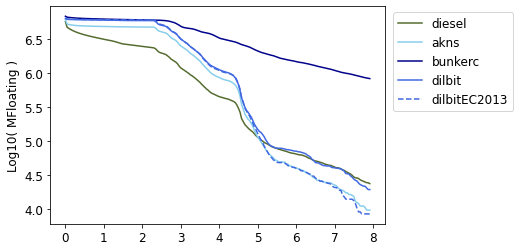

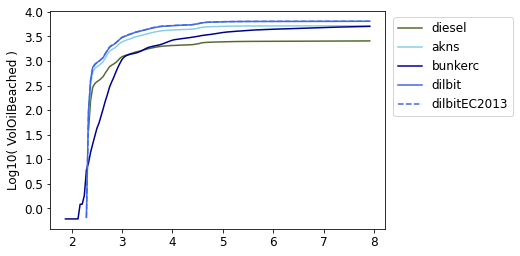

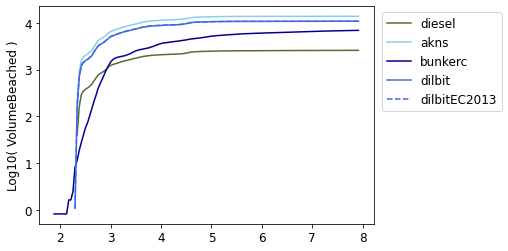

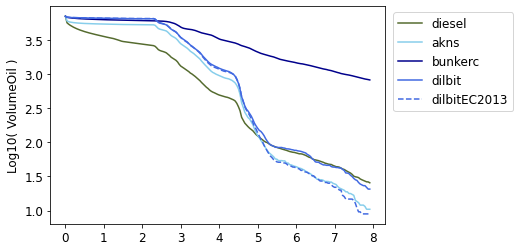

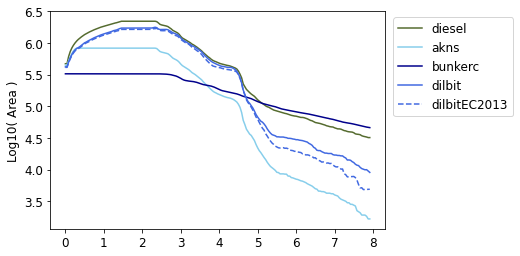

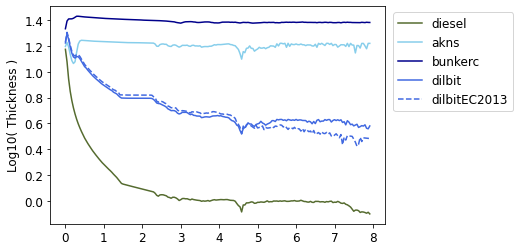

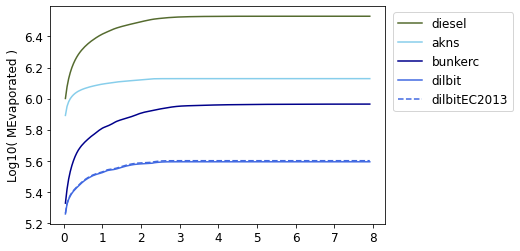

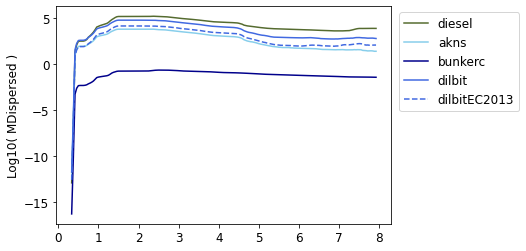

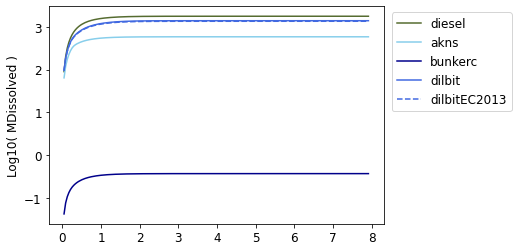

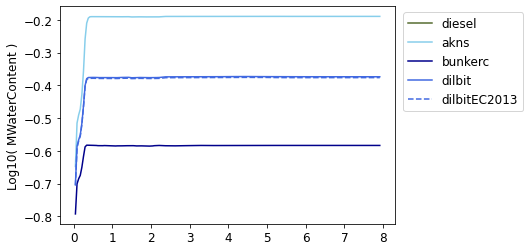

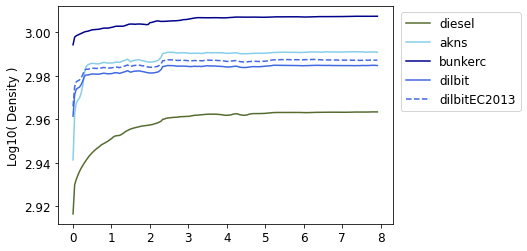

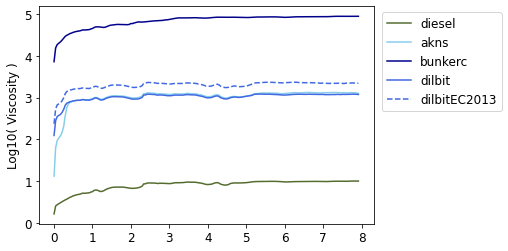

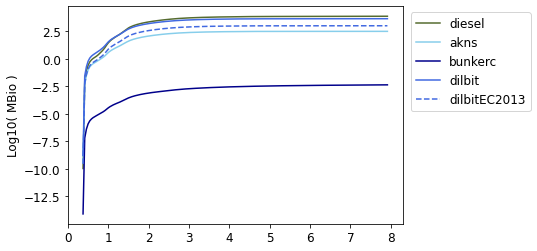

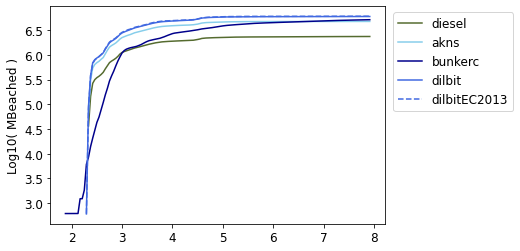

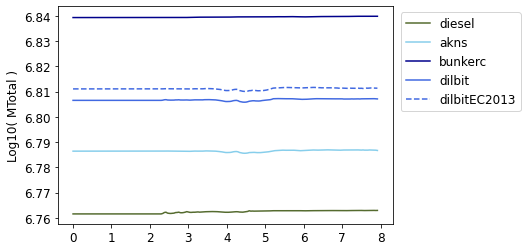

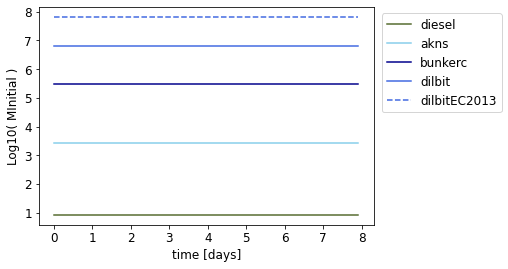

In [17]:
for value in plot_values:
    #yscale = 'log' if 'Viscosity' in value else 'linear'
    yscale = 'linear'
    fig, ax = plt.subplots()
    for oil in oil_types:
        ax.plot(np.log10(sro_results[oil][value]),
               label = oil,
               linewidth=1.5,
               linestyle=linestyle_dict.get(oil,'-'),
               color = color_dict.get(oil,'#333333'))

    ax.set_ylabel(f'Log10( {value} )')
    if value in plot_values[-1]:
        ax.set_xlabel('time [days]')
    ax.set_yscale(yscale)
    ax.legend(bbox_to_anchor=(1.4, 1))
    #plt.savefig(graphics_path/f'{value}.png')